In [5]:
import sys 
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx 
import nxviz as nv

from Island import Island
from Member import Member
from Analyzer import Analyzer
from time import time
from Land import Land
from utils import save
import os

# rng = np.random.default_rng()
island = Island(200, (20, 20), 2022)
# island = Island.load_from_pickle("data/Nov/15_13-23/180.pkl")

In [6]:
path = save.datetime_dir("../data")
# path = dir+"test_run/"
# os.mkdir(path)
Island._RECORD_PERIOD = 10

Current save directory: ../data/Dec/11_23-11/


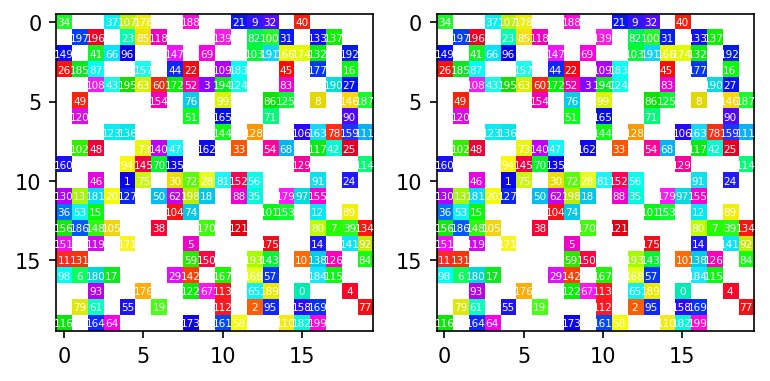

In [7]:
island.land.plot()

In [8]:
for i in range(500):
    island.new_round(record_path=path)
    island.trade()
    island.land_distribute()
    island.colonize()
    island.consume()
    island.fight()
    island.produce()
    island.reproduce()

    if island.is_dead:
        break


## Analyze

##################### 124 #####################
===================== 攻击 =====================
===================== 给予 =====================
==================== 给予土地 ====================
本轮出生：[]
本轮死亡：[Raynard(169)]
本轮总给予：0.0
本轮总攻击：0.0
本轮总产量：151.0
本轮总消耗：278.9
	 ID Sur_ID  姓名          年龄   血量    仓库    土地数



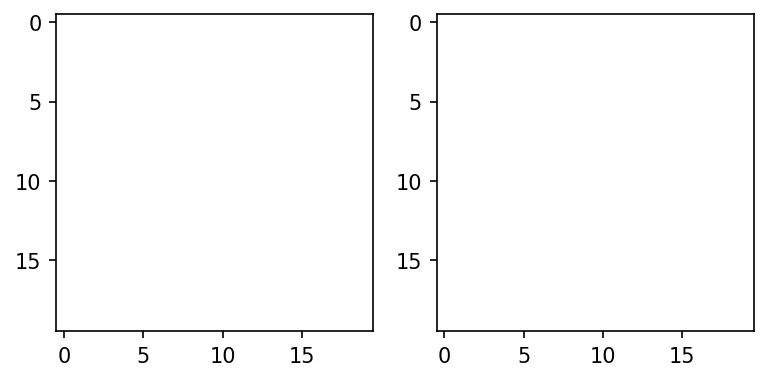

In [8]:
island.print_status(action=True)
island.land.plot()

In [9]:
mem11 = island.current_members[1]

IndexError: list index out of range

In [5]:
def print_sur_id(mem_list):
    sur_id = [mem.surviver_id for mem in mem_list]
    print(sur_id)

def get_pos(mem_list):
    pos = []
    for mem in mem_list:
        for p in mem.owned_land:
            pos.append(p)
    return pos

def assign_color(rgb_map, pos_list, rgb_color):
    """
    rgb_map has shape (land_x, land_y, 3)
    """
    for pos in pos_list:
        rgb_map[pos + (slice(None),)] = rgb_color
    
    return rgb_map

In inter = 0, ispassed: 
	 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 0.]]
	 Now in pos: (2, 2), 0.0, 2
	 Now in pos: (1, 3), 0.0, 2
	 Now in pos: (2, 0), 0.0, 2
	 Now in pos: (3, 3), 0.0, 2
In inter = 1, ispassed: 
	 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 2.]]
	 Now in pos: (0, 3), 0.0, 1
	 Now in pos: (3, 0), 0.0, 1
	 Now in pos: (3, 2), 0.0, 1
In inter = 2, ispassed: 
	 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 1. 2.]]
	 Now in pos: (3, 3), 2.0, 0
	 Now in pos: (2, 2), 0.0, 0
	 Now in pos: (0, 2), 0.0, 0
	 Now in pos: (3, 1), 0.0, 0
	 Now in pos: (2, 3), 3.0, 1
[9, 0, 6]


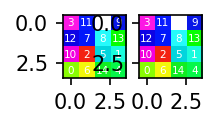

In [6]:
island.land.plot()

island._get_neighbors(mem11)
# print_sur_id(mem11.current_clear_list)
# print(mem11.current_empty_loc_list)
if mem11.current_neighbor_blocked_list != []:
    _, neibor_block = zip(*mem11.current_neighbor_blocked_list)
    print_sur_id(neibor_block)
# print_sur_id(mem11.current_self_blocked_list)

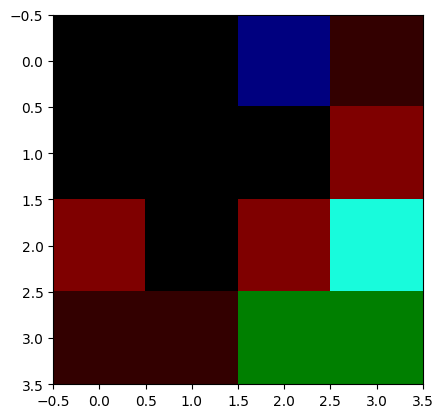

In [7]:
rgb_map = np.zeros((island.land.shape + (3,)))

rgb_map = assign_color(rgb_map, mem11.owned_land, np.array(mem11._color) / 256)
rgb_map = assign_color(rgb_map, get_pos(mem11.current_clear_list), [0.0, 0.5, 0])
rgb_map = assign_color(rgb_map, get_pos(mem11.current_self_blocked_list), [0.5, 0.0, 0])
if mem11.current_neighbor_blocked_list != []:
    rgb_map = assign_color(rgb_map, get_pos(neibor_block), [0.2, 0.0, 0])
rgb_map = assign_color(rgb_map, mem11.current_empty_loc_list, [0, 0, 0.5])


plt.imshow(rgb_map)
plt.show()

In [25]:
mem11.current_neighbor_blocked_list

[(Liborio(45), Lavanda(132)),
 (Annamaria(220), Lavanda(132)),
 (Liborio(45), Janiesha(208)),
 (Jemar(22), Syrena(202))]

In [ ]:
ana.generate_clear_graph()

In [ ]:
island.current_members

[Neel(2),
 Ander(5),
 Donyetta(9),
 Norine(10),
 Yuri(13),
 Glendy(19),
 Shaindy(22),
 Lirio(32),
 Clarrisa(40),
 Kane(45),
 Gianpaolo(46),
 Dasmond(48),
 Manual(57),
 Corry(61),
 Parag(64),
 Larenzo(68),
 Wiley(73),
 Lashanna(74),
 Laneka(75),
 Benaiah(76),
 Nissa(77),
 Sherod(78),
 Ramero(79),
 Gasper(81),
 Teneshia(86)]

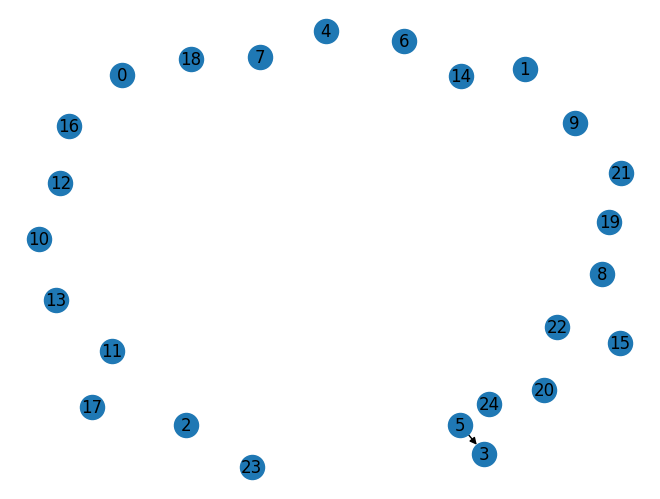

In [ ]:
nx.draw(ana.clear_graph, with_labels=True)
plt.show()

In [22]:
island.all_members[2].surviver_id

0

In [23]:
island.new_round()
island.consume()
island.print_status()


##################### 102 #####################
===================== 攻击 =====================
===================== 给予 =====================
==================== 给予土地 ====================
	Tatum(18) --3.0-> Caron(8)
	Kirstin(6) --3.0-> Magdalena(1)
	Cleve(12) --3.0-> Dora(4)
	Caron(8) --8.0-> Neel(2)
	Donyetta(9) --1.0-> Dam(14)
	Neel(2) --10.0-> Winter(16)
	David(15) --2.0-> Perri(20)
	Dustn(11) --2.0-> Perri(20)
	Caron(8) --4.0-> Germaine(21)
	David(15) --2.0-> Germaine(21)
	Cleve(12) --9.0-> Tatum(18)
	Winter(16) --3.0-> Caron(8)
	Caron(8) --8.0-> Tatum(18)
	Keyanna(17) --1.0-> Perri(20)
	Winter(16) --4.0-> Tatum(18)
	Tatum(18) --1.0-> Germaine(21)
	Lynae(0) --3.0-> Magdalena(1)
	Dustn(11) --2.0-> Shaindy(22)
	David(15) --7.0-> Shaindy(22)
	Sharita(3) --2.0-> Jakia(23)
	Dustn(11) --2.0-> Jakia(23)
	Brick(7) --6.0-> Caron(8)
	Donyetta(9) --1.0-> Lynae(0)
	Dustn(11) --2.0-> Shashana(24)
	Sharita(3) --2.0-> Shashana(24)
	Tatum(18) --3.0-> Garron(25)
	David(15) --2.0-> Garron(25)
	Shar

In [24]:
morgen = island.member_by_name("Morgen")

KeyError: 'Member Morgen not found!'

In [ ]:
island._get_neighbors(morgen)

In [ ]:
morgen.current_empty_loc_list

[(3, 0),
 (2, 1),
 (3, 4),
 (1, 1),
 (4, 1),
 (3, 4),
 (3, 0),
 (0, 1),
 (1, 2),
 (4, 2),
 (0, 1),
 (4, 2),
 (2, 2),
 (3, 1),
 (4, 2),
 (3, 4),
 (2, 2),
 (1, 2)]

In [ ]:
boy.owned_land

NameError: name 'boy' is not defined

In [ ]:
island._discard_land(marv, (1, 1))

NameError: name 'marv' is not defined

In [ ]:
island.land

[[Boy(3) , None, None, None, None], [None, None, None, Morgen(1) , None], [None, None, None, None, None], [None, None, None, Arnisha(4) , None], [Jerin(2) , None, None, None, None]]

In [ ]:
rng.choice(range(10), 3, replace=False)

array([1, 5, 7])

In [ ]:
m1 = Member("1", id=1, surviver_id=0, rng=rng)
m2 = Member("2", id=2, surviver_id=0, rng=rng)
m3 = Member("3", id=3, surviver_id=0, rng=rng)
m4 = Member("4", id=4, surviver_id=0, rng=rng)
m5 = Member("5", id=5, surviver_id=0, rng=rng)
m6 = Member("6", id=6, surviver_id=0, rng=rng)
m7 = Member("7", id=7, surviver_id=0, rng=rng)
m8 = Member("8", id=8, surviver_id=0, rng=rng)

In [ ]:
land = Land((6, 5))
land.owner = [
    [None, m1, m1, None, m1],
    [m1, m1, m3, m5, m5],
    [m6, m6, m4, m4, m1],
    [m7, m1, None, m1, m1],
    [m1, m1, m1, m1, m1],
    [m4, m8, m2, m1, m1],
]

NameError: name 'm1' is not defined

In [ ]:
clear_list = []
self_blocked_list = []
neighbor_blocked_list = []
empty_loc_list = []

is_passed = np.zeros((6, 5))

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (2, 2),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)

land._find_neighbors(
    clear_list,
    self_blocked_list,
    neighbor_blocked_list,
    empty_loc_list,
    location = (5, 0),
    member = m4,
    is_passed = is_passed,
    iteration_cnt = 0,
    island = None
)

print(is_passed)
print(clear_list)
print(self_blocked_list)
print(neighbor_blocked_list)
print(empty_loc_list)

NameError: name 'm4' is not defined

In [ ]:
1 == True

True

In [ ]:
os.mkdir("test1/0/")

In [ ]:
island = Island(50, random_seed=2022)

In [ ]:
island.fight()
island.trade()

In [ ]:
island.save_current_island("test_")

In [ ]:
x.save_to_row()

attack
offer
reproduce


,name,surviver_id,productivity,vitality,cargo,age,attack_self_productivity,attack_self_vitality,attack_self_cargo,attack_self_age,...,reproduce_obj_productivity,reproduce_obj_vitality,reproduce_obj_cargo,reproduce_obj_age,reproduce_victim_overlap,reproduce_benefit_overlap,reproduce_victim_passive,reproduce_victim_active,reproduce_benefit_passive,reproduce_benefit_active
0,Marvell,0,14.493567,26.657547,37.384384,89,0.054261,0.695186,0.868202,0.0,...,0.270527,0.620712,0.270702,0.0,0.738614,0.408641,-0.314751,-0.615778,0.949761,0.262216


In [ ]:
island.new_round()

In [ ]:
island.produce()

In [ ]:
island.fight()

In [ ]:
island.consume()

In [ ]:
island.relationship_dict["benefit"][26, 18]

In [ ]:
island.trade()

In [ ]:
island.trade()
island.print_info()

In [ ]:
island.relationship_dict["benefit"][1, 48]

In [ ]:
island.new_round()

In [ ]:
for mem in groups[0]:
    for obj in groups[0]:
        if mem is not obj:
            print(mem, obj, mem.decision("fight", obj, island))


In [ ]:
member1 = island.all_members[0]
member2 = island.all_members[1]

In [ ]:
member1.fight_parameter

In [ ]:
member1.fight_parameter[0] = 0
member1.parameter_dict["fight"]

In [ ]:
inputs = list(member1._generate_decision_inputs(member2, island).values())
member1._decision(member1.fight_parameter, inputs)

In [ ]:
range(1, 10)

In [ ]:
Member.born(island.all_members[0], island.all_members[1])

In [ ]:
a = [1, 2, 3, 4]
np.repeat(a, 2)

In [ ]:
a = ["a", "b"]
b = [np.random.rand(2), np.random.rand(2)]
d = dict(zip(a, b))
d

In [ ]:
n = {key: d[key] for key in d.keys()}
n

In [ ]:
class foo:
    def __init__(self, a):
        self.a = a

    @property
    def return_a(self):
        return self.a * 2

In [ ]:
x = foo(1)
x.return_a

In [ ]:
island = Island(42, random_seed=2022)
island.fight()

In [ ]:
# seed = time()
rng = np.random.default_rng(2022)

In [ ]:
rng.random(1)

In [ ]:
def f(x: np.ndarray):
    print(x)

In [ ]:
(np.array([None, 1]) == None).any()

In [ ]:
b = np.array([[0], [1]])
c = np.array([[10], [100]])
a = [b, c]
a

In [ ]:
for idx in range(len(a)):
    a[idx].resize(1, refcheck=False)

a

In [ ]:
b

In [ ]:
island = Island(4)
print(island.victim_memory)
np.fill_diagonal(island.victim_memory, np.nan)
print(island.victim_memory)


In [ ]:
somebody_die = [island.current_members[3], island.current_members[2]]

In [ ]:
somebody_born = [Member("aha", 1, None), Member("aha", 99, None)]

In [ ]:
print(island.all_members)
print(island.current_members)
print(island.victim_memory)
print(island.benefit_memory)

In [ ]:
island.member_list_modify(somebody_born, somebody_die, np.zeros((2, 4)), np.zeros((4, 2)))
print(island.all_members)
print(island.current_members)
print(island.current_member_num)
print(island.victim_memory)
print(island.benefit_memory)
print(island.current_members[-1].surviver_id)
print(island.all_members[-1].surviver_id)
print(island.all_members[-1].id)

In [ ]:
a = np.random.rand(5, 5)
a

In [ ]:
a = np.delete(a, (1, 2), axis=0)
a = np.delete(a, (1, 2), axis=1)
a

In [ ]:
a = np.delete(a, (1), axis=1)
a

In [ ]:
b = a[0]
b

In [ ]:
np.sort(b)[::-1]

In [ ]:
island = Island(10)
print(island.all_members)


In [ ]:
island.all_members
print(island.current_members)

In [ ]:
island.all_members[0].name = "aaaaa"
print(island.all_members)
print(island.current_members)

In [ ]:
np.random.seed(1)
x = np.random.random(10)
print(x)
print(np.random.normal(x[0], 1, 10))

In [ ]:
a = [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
a.append([[9, 0], [1, 2]])
arr = np.array(a)
arr.reshape(3, 4)

In [ ]:
arr.reshape(3, 2, 2)

In [ ]:
pd.DataFrame([[1,2,3],[4,5,6]], index=['a','b'], columns=["g", 'h', 'j'])

In [ ]:
a = ["a", "b", "c"]
np.random.shuffle(a)
a

In [ ]:
a = np.array([0, 1, 2, 3])
b = [True, False, True, False]
a[b]

In [ ]:
plt.plot([1 ,2 ,3], [1, 2, None])

In [ ]:
print(plt.cm.RdYlGn)

In [ ]:
list = np.array([1, 2, 3 ,4, 5])
list[list < 3] = 0
list

In [ ]:
list = ['iarry', 'harry', 'hbrry']
arg_sort_list = np.argsort(list)
arg_sort_list

In [ ]:
list = [list[i] for i in arg_sort_list]
list

In [ ]:
np.split((np.arange(10)), 2)

In [ ]:
mat = np.random.rand(3, 3)
mat = [[1, 2, 3], [2, 0, 4], [1, 2, 1]]
mat

In [ ]:
max_mat_element = np.argmax(np.sum(mat, 1))
max_mat_element

In [ ]:
class test_class:
    def __init__(self):
        self.att = 1

def change(cl):
    cl.att = 2

a = test_class()
change(a)
a.att

In [ ]:
str = ""
str == ""

In [ ]:
np.random.choice([1, 2, 3], size=1, p = [1, 2, 3])